In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import classification_report

In [2]:
df_train = pd.read_csv("./train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Engineering from Week 3

In [5]:
df_train[['female','male']] = pd.get_dummies(df_train['Sex'])
df_train[["C","Q","S"]] = pd.get_dummies(df_train["Embarked"])
df_train.fillna(method="ffill",inplace=True)
drop_features = ["Sex",'Ticket','Name','Cabin',"Embarked"]
df_train.drop(drop_features,inplace=True,axis=1)

In [6]:
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,0,3,19.0,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [36]:
## Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(df_train.loc[:,'Pclass':],df_train.Survived,\
                                                          test_size=0.2)

## Decision Tree

In [37]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(dt_model, 
#                    feature_names=['Pclass','Fare'],  
#                    class_names=['1','0'],
#                    filled=True)


In [39]:
dt_model_predictions = dt_model.predict(x_test)

In [40]:
print(classification_report(y_test,dt_model_predictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       124
           1       0.66      0.69      0.67        55

    accuracy                           0.79       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.80      0.79      0.79       179



## Random Forest

In [41]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
rf_model_predictions = rf_model.predict(x_test)

In [46]:
print(classification_report(y_test,rf_model_predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       124
           1       0.67      0.62      0.64        55

    accuracy                           0.79       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.78      0.79      0.79       179



## Feature Importances

- This is very helpful in explaining the model predictions

Feature:  Pclass ; Score:  0.0784112108498989
Feature:  Age ; Score:  0.2697420606271587
Feature:  SibSp ; Score:  0.04309849086256009
Feature:  Parch ; Score:  0.040075515814979146
Feature:  Fare ; Score:  0.2518127948865657
Feature:  female ; Score:  0.13921135204487273
Feature:  male ; Score:  0.1397779700260302
Feature:  C ; Score:  0.012295626507055357
Feature:  Q ; Score:  0.010516912693336381
Feature:  S ; Score:  0.015058065687542647


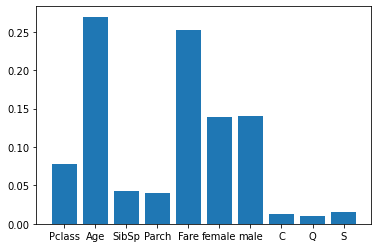

In [65]:
feature_importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(feature_importance):
	print("Feature: ",df_train.loc[:,'Pclass':].columns[i],"; Score: ",v)
# plot feature importance
plt.bar(df_train.loc[:,'Pclass':].columns, feature_importance)
plt.show()

In [66]:
## Explore the Gradient Boosting and XGBoosting algorithm predictions yourself